# WHFast tutorial

This tutorial is an introduction to the python interface of WHFast, a fast and unbiased symplectic Wisdom-Holman integrator. The method is described in Rein & Tamayo (2015).

###Installing REBOUND
You first need to make sure you have an up-to-date version of REBOUND installed. REBOUND is a software package that includes the WHFast integrator among other. Installing REBOUND is very easy.

Optionally, you can create a virtual environment to keep your python installation clean. This is recommended, but you need to have virtualenv installed (also, if you use the Anaconda python distribution, you'll need to instead create a conda environment--see the README file).

Simply open a terminal window, go to the folder where you want REBOUND to be installed and enter:

    virtualenv venv
    
This creates a virtual environment named `venv`. To activate it, type:

    source venv/bin/activate

If you log out of your terminal or open a new one, you'll need to reactive the virtual environment with the above command. Now you can install REBOUND using pip:

    pip install rebound

The setup script will download the latest version of REBOUND from PyPI, compile the C code in the background and place all the files in their correct location in the virtual environment. No other libraries are needed to start working with WHFast and REBOUND, but you might want to install numpy and matplotlib to be able to post-process your data and make plots. Installing those libraries is also very easy (but may need a few minutes to compile):

    pip install numpy matplotlib
    
That's all there is to do!

### First WHFast integration
Let us now perform our first WHFast integration. You can enter all the commands below into a file and execute it all at once, or open an interactive shell).

First, we need to import the REBOUND module (make sure have have enabled the virtual environment if you used it to install REBOUND).

In [1]:
import rebound

Next, let's add some particles. We'll work in units in which $G=1$ (see below on how to set $G$ to another value). The first particle we add is the central object. We place it at rest at the origin and use the convention of setting the mass of the central object $M_*$ to 1:

In [2]:
rebound.add(m=1.)

Let's look at the particle we just added:

In [3]:
print(rebound.get_particles()[0])

<rebound.Particle object, m=1.0 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>


The output tells us that the mass of the particle is 1 and all coordinates are zero. 

The next particle we're adding is a planet. We'll use Cartesian coordinates to initialize it. Any coordinate that we do not specify in the `rebound.add()` command is assumed to be 0. We place our planet on a circular orbit at $a=1$ and give it a mass of $10^{-3}$ times that of the central star.

In [4]:
rebound.add(m=1e-3, x=1., vy=1.)

Instead of initializing the particle with Cartesian coordinates, we can also use orbital elements. By default, REBOUND will use Jacobi coordinates, i.e. REBOUND assumes the orbital elements describe the particle's orbit around the centre of mass of all particles added previously. Our second planet will have a mass of $10^{-3}$, a semimajoraxis of $a=2$ and an eccentricity of $e=0.1$:

In [5]:
rebound.add(m=1e-3, a=2., e=0.1)

Now that we have added two more particles, let's have a quick look at what's "in REBOUND" by using

In [6]:
rebound.status()

---------------------------------
Rebound version:     	0.1.36
Build on:            	May  7 2015 15:47:18
Number of particles: 	3
Simulation time:     	0.000000
---------------------------------
<rebound.Particle object, m=1.0 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.Particle object, m=0.001 x=1.0 y=0.0 z=0.0 vx=0.0 vy=1.0 vz=0.0>
<rebound.Particle object, m=0.001 x=1.800999001 y=0.0 z=0.0 vx=0.0 vy=0.783516306452 vz=0.0>
---------------------------------


Next, let's tell REBOUND which integrator (WHFast, of course!) and timestep we want to use. In our system of units, an orbit at $a=1$ has the orbital period of $T_{\rm orb} =2\pi \sqrt{\frac{GM}{a}}= 2\pi$. 
So a reasonable timestep to start with would be $dt=10^{-3}$.

In [7]:
rebound.set_integrator("whfast")
rebound.set_dt(1e-3)

`whfast` referrs to the 2nd order symplectic integrator WHFast described by Rein & Tamayo (2015). By default 11th order symplectic correctors are used. 

We are now ready to start the integration. Let's integrate for one orbit, i.e. until $t=2\pi$.

In [8]:
rebound.integrate(6.28318530717959)   # 6.28318530717959 is 2*pi

Once again, let's look at what REBOUND's status is

In [9]:
rebound.status()

---------------------------------
Rebound version:     	0.1.36
Build on:            	May  7 2015 15:47:18
Number of particles: 	3
Simulation time:     	6.283185
---------------------------------
<rebound.Particle object, m=1.0 x=0.00332573194132 y=0.00967364202585 z=0.0 vx=0.000518779802174 vy=0.00121988077305 vz=0.0>
<rebound.Particle object, m=0.001 x=1.0032889618 y=0.0358142574188 z=0.0 vx=-0.0235819517929 vy=0.999999767769 vz=0.0>
<rebound.Particle object, m=0.001 x=-1.52802190212 y=1.49670716854 z=0.0 vx=-0.495197850381 vy=-0.436364234372 vz=0.0>
---------------------------------


As you can see the time has advanced to $t=2\pi$ and the positions and velocities of *all* particles have changed. If you want to post-process the particle data, you can access it in the following way:

In [10]:
particles = rebound.get_particles()
for i in range(rebound.get_N()):
    print(particles[i].x, particles[i].y, particles[i].vx, particles[i].vy)

(0.003325731941322482, 0.009673642025850698, 0.0005187798021738547, 0.0012198807730549165)
(1.003288961798006, 0.03581425741879324, -0.023581951792887232, 0.9999997677690643)
(-1.5280219021214863, 1.4967071685447304, -0.4951978503809675, -0.43636423437203753)


The `particles` object is a pointer to the particle array in memory. This means you can call `particles = rebound.get_particles()` before the integration and the contents of `particles` will be updated after the integration. If you add or remove particles, you'll need to call `get_particles()` again.

## Visualization with matplotlib
Instead of just printing boring numbers at the end of the simulation, let's visualize the orbit using matplotlib (you'll need to install numpy and matplotlib to run this example, see above).

We'll use the same particles as above. As the particles are already in memory, we don't need to add them again. Let us plot the position of the inner planet at 100 steps during its orbit. First, we'll import numpy and create an array of times for which we want to have an output (here, from $T_{\rm orb}$ to $2 T_{\rm orb}$ (we have already advanced the simulation time to $t=2\pi$).

In [11]:
import numpy as np
torb = 2.*np.pi
Noutputs = 100
times = np.linspace(torb, 2.*torb, Noutputs)
x = np.zeros(Noutputs)
y = np.zeros(Noutputs)

Next, we'll step through the simulation. Rebound will integrate up to `time`. Depending on the timestep, it might overshoot slightly. If you want to have the outputs at exactly the time you specify you can set the `exactTime=1` flag in the `integrate` function. However, note that changing the timestep in a symplectic integrator could have negative impacts on its properties.

In [12]:
for i,time in enumerate(times):
    rebound.integrate(time)
    x[i] = particles[1].x
    y[i] = particles[1].y

Let's plot the orbit using matplotlib.

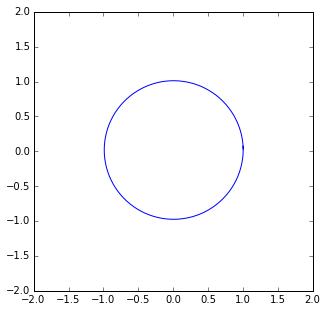

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.plot(x, y);

Hurray! It worked. The orbit looks like it should, it's an almost perfect circle. There are small perturbations though, induced by the outer planet. Let's integrate a bit longer to see them. 

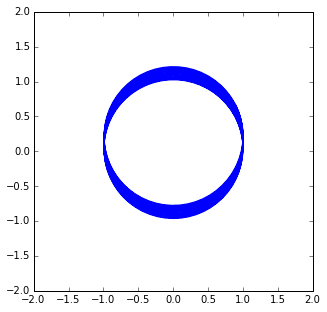

In [14]:
Noutputs = 1000
times = np.linspace(2.*torb, 20.*torb, Noutputs)
x = np.zeros(Noutputs)
y = np.zeros(Noutputs)
for i,time in enumerate(times):
    rebound.integrate(time)
    x[i] = particles[1].x
    y[i] = particles[1].y
    
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
plt.plot(x, y);

Oops! This doesn't look like what we expected to see (small perturbations to an almost circluar orbit). What you see here is the barycenter slowly drifting. Some integration packages require that the simulation be carried out in a particular frame, but WHFast provides extra flexibility by working in any inertial frame.  If you recall how we added the particles, the Sun was at the origin and at rest, and then we added the planets.  This means that the center of mass, or barycenter, will have a small velocity, which results in the observed drift.  There are multiple ways we can get the plot we want to.
1. We can calculate only relative positions.
2. We can add the particles in the barycentric frame.
3. We can make REBOUND do the work and let it transform the particle coordinates to the bayrcentric frame.
Let's use the third option (next time you run a simulation, you probably want to do that at the beginning).

In [15]:
rebound.move_to_center_of_momentum()

So let's try this again. Let's integrate for a bit longer this time.

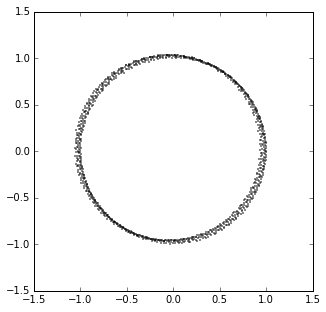

In [16]:
times = np.linspace(20.*torb, 1000.*torb, Noutputs)
for i,time in enumerate(times):
    rebound.integrate(time)
    x[i] = particles[1].x
    y[i] = particles[1].y
    
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-1.5,1.5])
ax.set_ylim([-1.5,1.5])
plt.scatter(x, y, marker='.', color='k', s=1.2);

That looks much more  like it. Let us finally plot the orbital elements as a function of time.

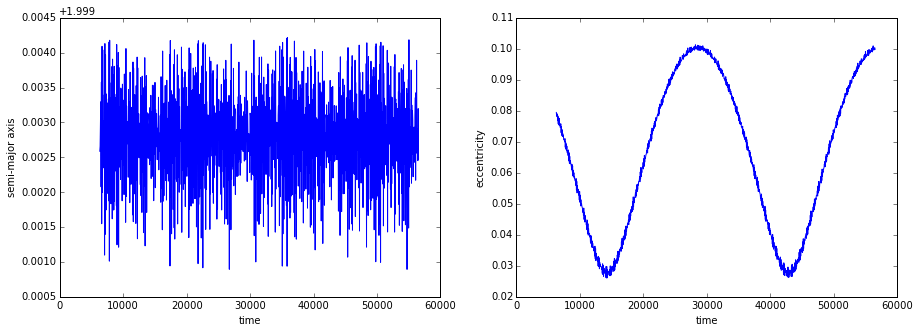

In [17]:
times = np.linspace(1000.*torb, 9000.*torb, Noutputs)
a = np.zeros(Noutputs)
e = np.zeros(Noutputs)
for i,time in enumerate(times):
    rebound.integrate(time)
    orbits = rebound.get_orbits()
    a[i] = orbits[1].a
    e[i] = orbits[1].e
    
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(121)
ax.set_xlabel("time")
ax.set_ylabel("semi-major axis")
plt.plot(times, a);

ax = plt.subplot(122)
ax.set_xlabel("time")
ax.set_ylabel("eccentricity")
plt.plot(times, e);

The semimajor axis seems to almost stay constant, whereas the eccentricity undergoes an oscillation. Thus, one might conclude the planets interact only secularly, i.e. there are no large resonant terms.